### Central Force and Elliptical Orbit  

In this section, elliptical orbit due gravitational force is discussed. The Cartesian and polar coordinates are used.  
#### Cartesian Coordinates 

The gravitational force between two masses $M$ and $m$ at distance $r$ is given by 

$$ \vec{F_G} = -G \frac{M m}{r^2} \hat {r}$$
The $x$ and $y$ components of the gravitational force are given by 
$$ F_{Gx} =- G \frac{M m}{r^2} \cos \theta = -G \frac{M m}{r^2} \frac{x}{r}=- (G M m) \frac{x}{r^3}= -(G M m) \frac{x}{(x^2+y^2)^{{3}/{2}}}$$

$$ F_{Gy} = -G \frac{M m}{r^2} \sin \theta =- G \frac{M m}{r^2} \frac{y}{r}= -G M m \frac{y}{r^3}=-(G M m) \frac{y}{(x^2+y^2)^{{3}/{2}}}$$

The Newton’s seconds law in $x$ and $y$ direction is given by 
$$ -(G M m) \frac{x}{(x^2+y^2)^{{3}/{2}}}=m a_x $$

$$ -(G M m) \frac{y}{(x^2+y^2)^{{3}/{2}}}=m a_y $$

The above equations yields 

$$ a_x=\frac{-G M x}{(x^2+y^2)^{{3}/{2}}}$$

$$ a_y=\frac{-G M y}{(x^2+y^2)^{{3}/{2}}}$$

The Euler-Cromer method $x$ and $y$ is given by
$$v_x(t_{i+1})=v_x(t_{i})+a_x(t_{i}) \Delta t = v_x(t_{i}) -  \left( \frac{G M x(t_{i})}{\left (x^2(t_{i})+y^2(t_{i}) \right)^{{3}/{2}}} \right ) \Delta t$$
$$x(t_{i+1})=x(t_{i})+v_x(t_{i+1}) \Delta t$$

$$v_y(t_{i+1})=v_y(t_{i})+a_y(t_{i}) \Delta t = v_y(t_{i}) -  \left( \frac{G M y(t_{i})}{\left(x^2(t_{i})+y^2(t_{i}) \right)^{{3}/{2}}} \right ) \Delta t$$
$$y(t_{i+1})=y(t_{i})+v_y(t_{i+1}) \Delta t$$


The orbit of is an ellipse and the equation of an ellipse is given by

$$ \frac {\left( x+f \right)^2 } {a^2} + \frac{y^2} {b^2} =1$$

where $a$ and $b$ are semimajor and semiminor axes and $f$ is the focal length.


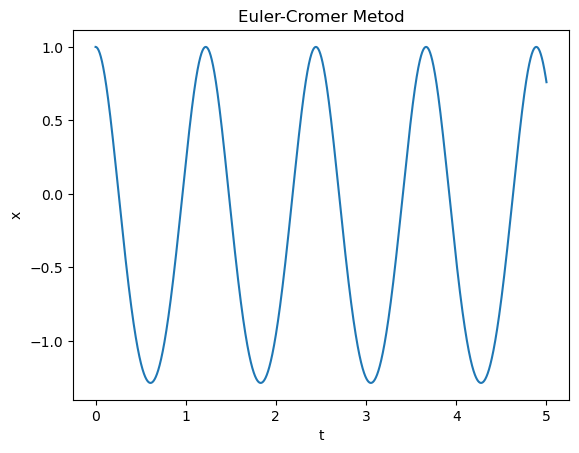

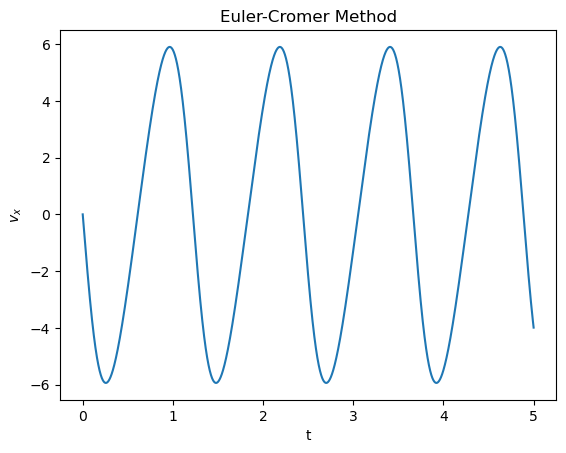

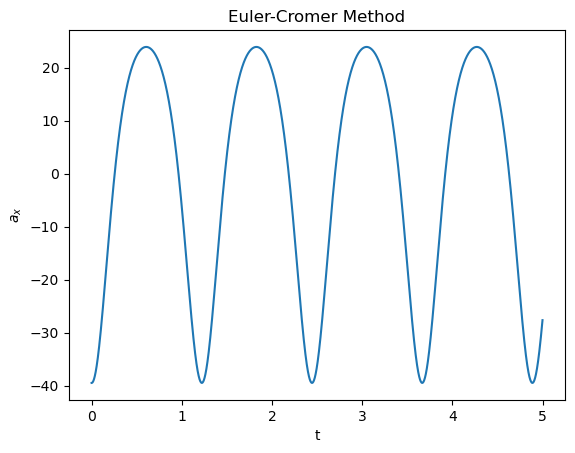

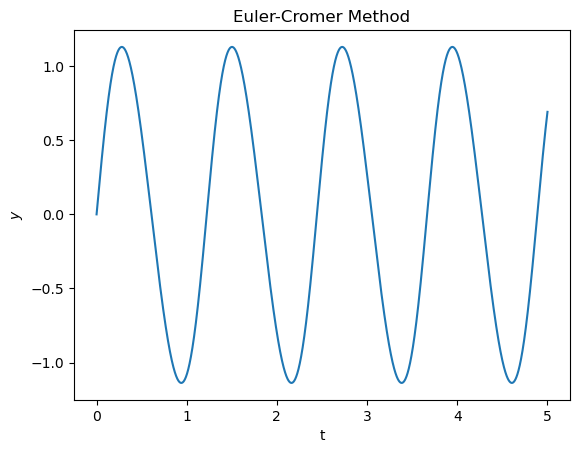

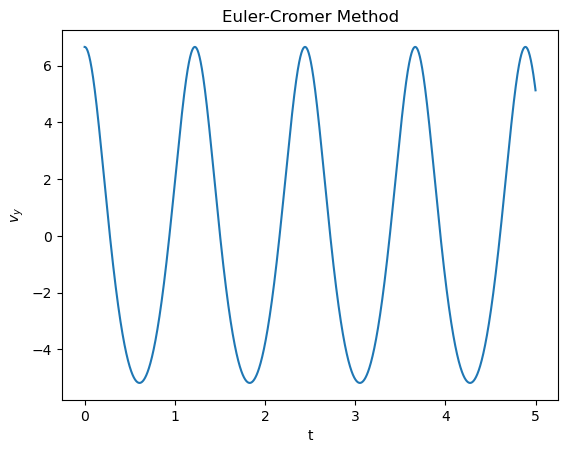

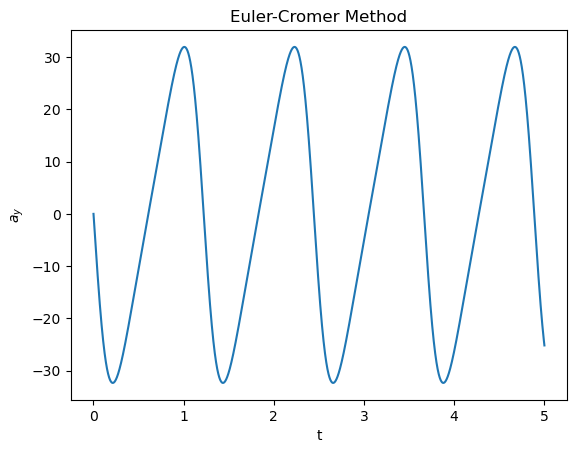

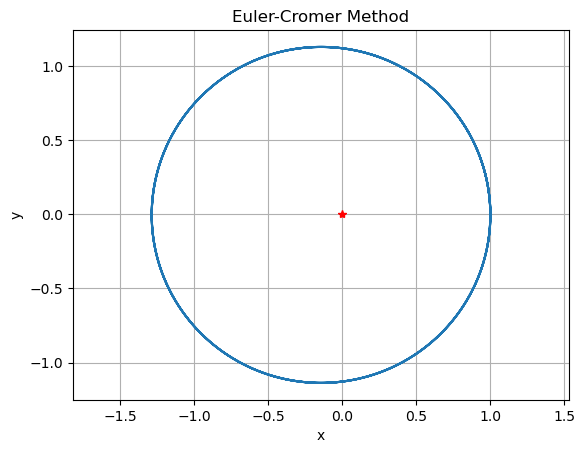

a= 1.1428741528754558 , b= 1.1339210912329074 , f= 0.14286971417843275 ,e= 0.12492500176270559 ,c= -1.128132286176354 , T= 1.222


In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

#Gravity, Orbital motion
GM=4*np.pi**2  #AU^3/yr^2
r0=1   #AU
theta0_D=0
theta0 = theta0_D*np.pi/180
v0=1.5*np.sqrt(2)*np.pi  #2*np.pi

del_t=0.001 
n=5000 
t=np.zeros(n+1)

x = np.zeros(n+1)
vx = np.zeros(n+1)
ax = np.zeros(n+1)

y = np.zeros(n+1)
vy = np.zeros(n+1)
ay = np.zeros(n+1)

x[0]=r0*np.cos(theta0)
y[0]=r0*np.sin(theta0)

vx[0]=v0*np.sin(theta0)
vy[0]=v0*np.cos(theta0)


ax[0]=-GM*x[0]/r0**3
ay[0]=-GM*y[0]/r0**3

Flag_T=1

# Euler-Cromer Method Method
for i in range(0,n):
    t[i+1]=(i+1)*del_t
    
    #x-direction:
    vx[i+1]=vx[i]+ax[i]*del_t
    x[i+1]=x[i]+vx[i+1]*del_t
    
    #y-direction:
    vy[i+1]=vy[i]+ay[i]*del_t
    y[i+1]=y[i]+vy[i+1]*del_t
    
    del_x=x[i+1]-x[i]
    if x[i+1] == 0 or (x[i+1]<= abs(del_x) and x[i+1] >= -abs(del_x)):
        c=y[i+1]
        
    #if Flag_T==1 and t[i]>0 and np.sign(y[i+1]) != np.sign(y[i]) :
    #    T=t[i+1]+t[i]
     #   Flag_T= 0
        
    if Flag_T==1 and t[i]>0 and np.sign(y[i+1]) != np.sign(y[i]) and x[i] >0:
        T=t[i+1]#+t[i]
        Flag_T= 0
    
    
    r=np.sqrt(x[i+1]**2+y[i+1]**2)
    
    ax[i+1]=-GM*x[i+1]/r**3
    ay[i+1]=-GM*y[i+1]/r**3
    
x_min=min(x)
x_max=max(x) 

y_min=min(y)
y_max=max(y)

if abs(x_min) < abs(x_max):
    r_min=abs(x_min)
    r_max=abs(x_max)
else: 
    r_min=abs(x_max)
    r_max=abs(x_min)

a=(r_min+r_max)/2   
b=(abs(max(y))+abs(min(y)))/2  

f=a-r_min
e=np.sqrt(1-(b/a)**2)


plt.figure(0)
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Euler-Cromer Metod')

plt.figure(1)
plt.plot(t,vx)
plt.xlabel('t')
plt.ylabel('$v_x$')
plt.title('Euler-Cromer Method')

plt.figure(2)
plt.plot(t,ax)
plt.xlabel('t')
plt.ylabel('$a_x$')
plt.title('Euler-Cromer Method')

plt.figure(3)
plt.plot(t,y)
plt.xlabel('t')
plt.ylabel('$y$')
plt.title('Euler-Cromer Method')

plt.figure(4)
plt.plot(t,vy)
plt.xlabel('t')
plt.ylabel('$v_y$')
plt.title('Euler-Cromer Method')

plt.figure(5)
plt.plot(t,ay)
plt.xlabel('t')
plt.ylabel('$a_y$')
plt.title('Euler-Cromer Method')

plt.figure(6)
plt.plot(0,0,'*r',x,y)
plt.axis('equal')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Euler-Cromer Method')

plt.show()
print('a=',a,', b=',b,', f=',f, ',e=', e, ',c=',c, ', T=',T)



#### The Polar Coordinates 
The gravitational force between two masses $M$ and $m$ at distance $r$ in polar coordinates is given by 

$$ -G \frac{M m}{r^2} = \frac{d^2 r}{dt^2} - r \left( \frac{d \theta}{dt} \right)^2 $$
$$ 0 = r\frac{d^2\theta}{dt^2}+2 \frac{dr}{dt} \frac{d\theta} {dt}$$

The above equations can be written as following

$$  \frac{d^2 r}{dt^2}= -G \frac{M m}{r^2} + r \left( \frac{d \theta}{dt} \right)^2 $$
$$ \frac{d^2\theta}{dt^2} = -\frac{2}{r} \frac{dr}{dt} \frac{d\theta} {dt}$$

or 

$$ \frac{dr}{dt}=v_r$$
$$ \frac{d \theta}{dt}=\omega$$
$$  \frac{d v_r}{dt}= -G \frac{M m}{r^2} + r \omega^2 $$
$$ \frac{d\omega}{dt} = -\frac{2}{r} v_r \omega$$

Using Finite-Difference Method, we have     

$$  v_r(t_{i+1})= v_r(t_{i})+ a_r(t_{i}) \Delta t=v_r(t_{i})+ \left( -G \frac{M m}{r^2(t_{i})} + r(t_{i}) \omega^2(t_{i}) \right) \Delta t $$

$$ \omega (t_{i+1}) = \omega (t_{i})+ \alpha (t_{i}) \Delta t=  \omega (t_{i}) + \left( -\frac{2}{r(t_{i})} v_r(t_{i}) \omega(t_{i}) \right) \Delta t$$

$$ r(t_{i+1})=r(t_{i})+ v_r (t_{i+1}) \Delta t$$
$$ \theta(t_{i+1})=\theta(t_{i})+ \omega(t_{i+1}) \Delta t$$

The equation or orbit in polar coordinate is given by 

$$ r(\theta)= \frac{c} {1+e \cos{\theta}} $$

where $e$ is eccentricity and for an ellipse is $0<e<1$ and for a circle is $e=1$ and $c$ is given by

$$ r \left(\frac{\pi}{2} \right) = \frac{c} {1+e \cos{ \left( \frac{\pi}{2} \right) }} $$
The above equation yields 
$$ c=r\left( \frac{\pi}{2} \right)$$

The minimum and maximum $r$ (i.e. $r_{min}=r(\theta=0), r_{max}=r(\theta=\pi)$ )  are given by

$$ r_{min}= \frac{c} {1+e}$$

$$ r_{max}= \frac{c} {1-e}$$

The semimajor and semiminor axes and focal length are given by 

$$ a= \frac {c} {1-e^2} $$

$$ b= \frac {c} {\sqrt{1-e^2} } $$

$$f=ae$$.
From above equations, the ratio of $\frac{a}{b}$ is given by
$$ \frac{b} {a} = \sqrt {1-e^2}$$.



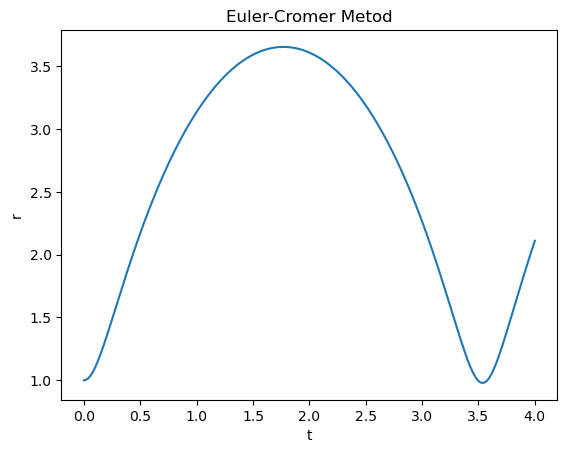

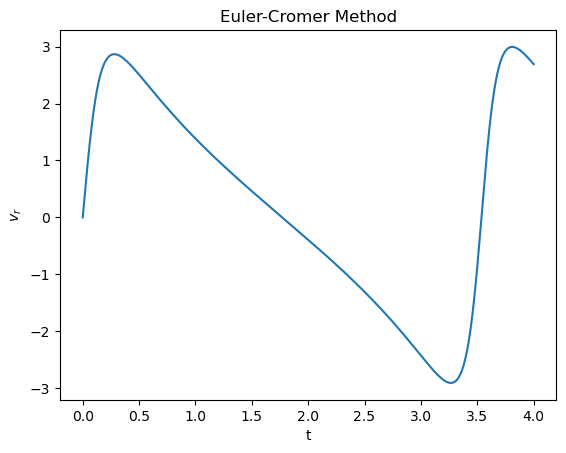

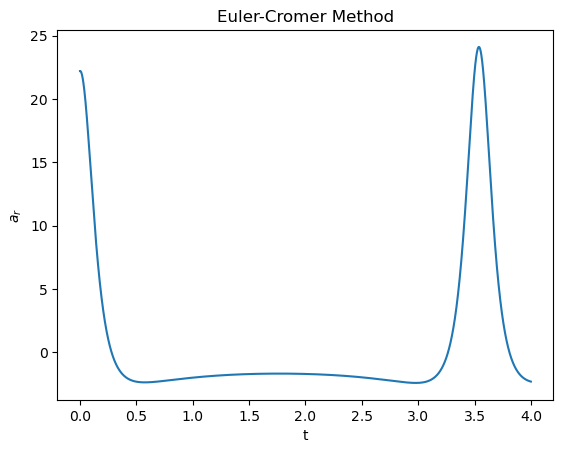

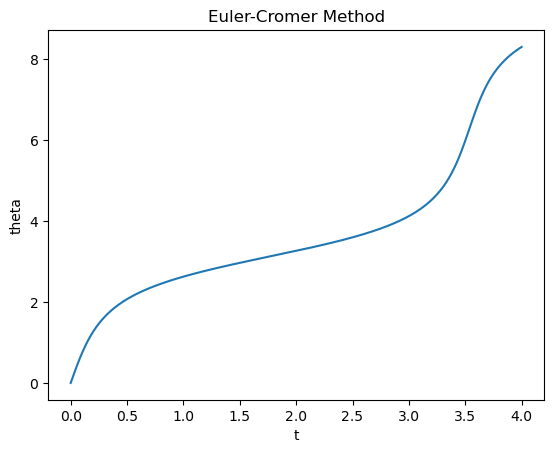

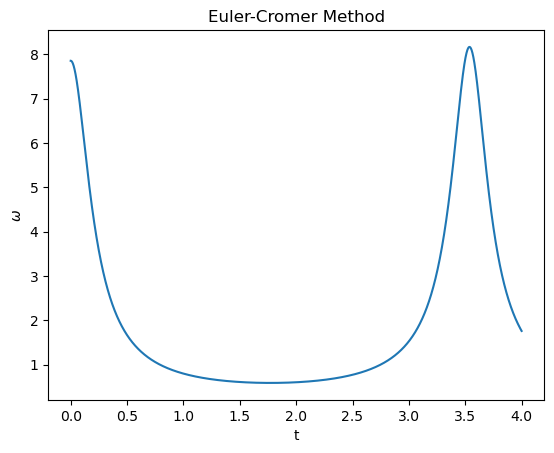

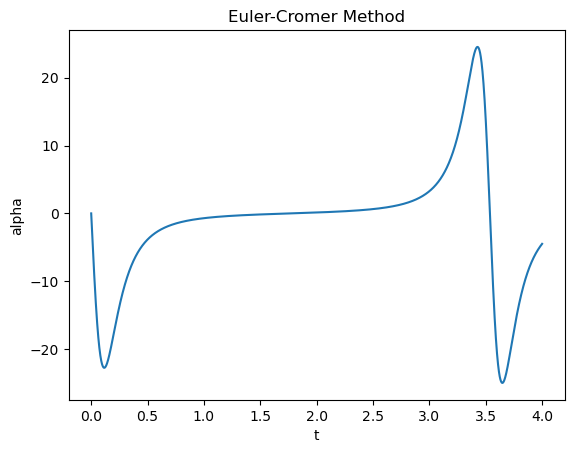

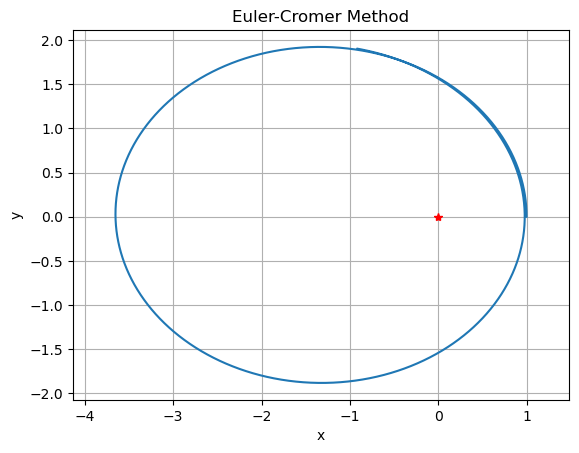

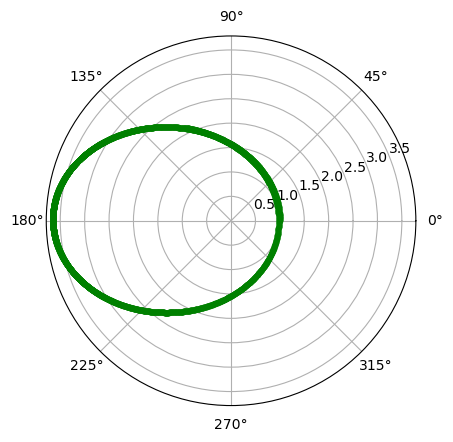

a= 2.3161643032889176 , b= 1.9014897053132649 , f= 1.3371411978710683 , e= 0.570978594358593 , c= 1.5748319723714381 ,T= 3.5375
Verification: f=a e= 1.3224802381954561 , a=c/(1-e^2)= 2.3366033462075286 , b=c/sqrt(1-e^2)= 1.9182694431069125
Kepler third law: T=sqrt((4 pi^2)/GM) a^3) = 3.571720705743634


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

#Gravity, Orbital motion
GM=4*np.pi**2  #AU^3/yr^2
r0=1   #AU
theta0_D=0
theta0=theta0_D*np.pi/180

vr0=0
omega0=2.5*np.pi


del_t=0.001
n=4000
t=np.zeros(n+1)

r = np.zeros(n+1)
vr = np.zeros(n+1)
ar = np.zeros(n+1)

theta = np.zeros(n+1)
omega = np.zeros(n+1)
alpha= np.zeros(n+1)

x= np.zeros(n+1)
y= np.zeros(n+1)

r[0]=r0
theta[0]=theta0

vr[0]=vr0
omega[0]=omega0

ar[0]=-GM/r[0]**2+r[0]*omega[0]**2
alpha[0]=-2*vr[0]*omega[0]/r[0]


x[0]=r[0]*np.cos(theta[0])
y[0]=r[0]*np.sin(theta[0])


# Euler-Cromer Method Method
for i in range(0,n):
    t[i+1]=(i+1)*del_t
    
    #r:
    vr[i+1]=vr[i]+ar[i]*del_t
    r[i+1]=r[i]+vr[i+1]*del_t
    
    
    #theta:
    omega[i+1]=omega[i]+alpha[i]*del_t
    theta[i+1]=theta[i]+omega[i+1]*del_t
    
    
    ar[i+1]=-GM/r[i+1]**2+r[i+1]*omega[i+1]**2
    alpha[i+1]=-2*vr[i+1]*omega[i+1]/r[i+1]
    
    x[i+1]=r[i+1]*np.cos(theta[i+1])
    y[i+1]=r[i+1]*np.sin(theta[i+1])
    
    
    del_theta=theta[i+1]-theta[i]
    if theta[i+1]== np.pi/2 or (theta[i+1]<= np.pi/2+abs(del_theta) and theta[i+1]>= np.pi/2-abs(del_theta)):
        c=y[i+1]
        
    if theta[i+1]== 2*np.pi or (theta[i+1]<= 2*np.pi+abs(del_theta) and theta[i+1]>= 2*np.pi-abs(del_theta)):
        T=(t[i+1]+t[i])/2
        
    
        

r_min=min(r)
r_max=max(r) 

y_min=min(y)
y_max=max(y)

a=(r_min+r_max)/2   
b=(abs(max(y))+abs(min(y)))/2  

f=a-r_min
e=np.sqrt(1-(b/a)**2)
    
    
    
plt.figure(0)
plt.plot(t,r)
plt.xlabel('t')
plt.ylabel('r')
plt.title('Euler-Cromer Metod')

plt.figure(1)
plt.plot(t,vr)
plt.xlabel('t')
plt.ylabel('$v_r$')
plt.title('Euler-Cromer Method')

plt.figure(2)
plt.plot(t,ar)
plt.xlabel('t')
plt.ylabel('$a_r$')
plt.title('Euler-Cromer Method')

plt.figure(3)
plt.plot(t,theta)
plt.xlabel('t')
plt.ylabel('theta')
plt.title('Euler-Cromer Method')

plt.figure(4)
plt.plot(t,omega)
plt.xlabel('t')
plt.ylabel('$\omega$')
plt.title('Euler-Cromer Method')

plt.figure(5)
plt.plot(t,alpha)
plt.xlabel('t')
plt.ylabel('alpha')
plt.title('Euler-Cromer Method')

plt.figure(6)
plt.plot(0,0,'*r',x,y)
plt.axis('equal')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Euler-Cromer Method')

plt.show()


plt.figure(7)
plt.axes(projection = 'polar')
plt.polar(theta, r, 'g.')
    
    
plt.show()
print('a=',a,', b=',b,', f=',f, ', e=', e, ', c=',c, ',T=',T)

# verification

f=a*e
a=c/(1-e**2)
b=c/np.sqrt(1-e**2)

print('Verification: f=a e=',f, ', a=c/(1-e^2)=',a,', b=c/sqrt(1-e^2)=',b )

# Kepler's third law: T^2=4*pi^2/GM a^3#

T=np.sqrt((4*np.pi**2/GM)*a**3)

print('Kepler third law: T=sqrt((4 pi^2)/GM) a^3) =',T)